# ML in Cybersecurity: Task I

## Team
  * **Team name**:  :flushed:
  * **Members**:  Tim Schneider (s8tiscne@stud.uni-saarland.de), Qiankun Zheng (qizh00001@stud.uni-saarland.de), Maximilian Löffler (s8maloef@stud.uni-saarland.de)


## Logistics
  * **Due date**: 11th November 2021, 23:59:59 (email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland)
  * Please include your team name and the task number in the file name and the email subject
  * Complete this in **teams of 3**
  * Feel free to use the forum or the mailing list to find group members.
  
## Timeline
  * 29-Oct-2021: Task 1 hand-out
  * **11-Nov-2021** (23:59:59): Email the completed notebook including outputs to mlcysec_ws2022_staff@lists.cispa.saarland
  * 12-Nov-2021: Task 1 discussion and summary
  
  
## About this task
In this task, you'll implement a digit classifier, based on the popular [MNIST](http://yann.lecun.com/exdb/mnist/) dataset. The dataset is based on a seminal [paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf), which immensely popularized (convolutional) neural networks. This is a great starting point for ML research and this dataset/model has been a stepping stone numerous other tasks such as [GANs](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf), [Adversarial Perturbations](https://arxiv.org/abs/1412.6572) and so many more!

This dataset consists of data $\mathcal{D} = \{x_i, y_i\}_{i=1}^N$, where $x_i$ is a 28x28 pixel grayscale image and $y_i$ is a scalar represeting digits between 0-9. The notebook will guide you to load this data, implement classifiers $\hat{y_i} = f_w(x_i)$  and analyze results. By doing so, you'll have a ML model that works on real data!

To put things into context, have a look at Slide 21 in the [second](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf) lecture. Within this framework, the following blocks of this task are fixed:
  * *Real-world problem*: Digit classification
  * *Performance metric*: Mean accuracy i.e., $ \frac{1}{N} \sum_{i=1}^N \mathbb{1}[\hat{y_i} = y_i]$, where $\mathbb{1}[\hat{y_i} = y_i]$ is 1 if your model predicted the right digit for the $i$-th digit and 0 otherwise.
  * *Data*: The MNIST dataset

You'll make the the following design-choices:
 * *Choice of Model*: A model family (Non-parametric methods, Linear classifiers, Neural Networks, etc.)
 * *ML Model*: Specific model (e.g., SVM with a polynomial kernel)
 * *Loss/Risk*
 * *Optimization*


## A Note on Grading
The grading for this task will depend on:
 1. Functional digit classifier
   * Following a well-defined ML pipeline
   * Developing 3 classification models (keep them diverse and ideally of increasing complexity)
   * Obtaining reasonable accuracies (>80%) on a held-out test set
 1. Analysis
   * Which methods work better than the rest and why?
   * Which hyper-parameters and design-choices were important in each of your methods?
   * Quantifying influence of these hyper-parameters on loss and/or validation accuracies
   * Trade-offs between methods, hyper-parameters, design-choices
    * Anything else you find interesting (this part is open-ended)
  
 A note on (1.): 
  * Choose your models that aids good insights. We require at least one non-Neural Network (e.g., SVM, KNN) and one Neural Network model (e.g., MLP, CNN).
  * We definitely don't expect all three models to achieve >99% test accuracies!

## Grading Details
 * 5 points for loading and visualization 
 * 25x3 points for models. Per model:
   * 4 points for written description 
   * 7 points for implementation
   * 7 points for evaluation
   * 7 points for summary
 * 15 points for final summary (Section 3)
 * 5 points for clean code
 
## Filling-in the Notebook
You'll be submitting this very notebook that is filled-in with your code and analysis. Make sure you submit one that has been previously executed in-order. (So that results/graphs are already visible upon opening it). 

The notebook you submit **should compile** (or should be self-contained and sufficiently commented). Check tutorial 1 on how to set up the Python3 environment.


**The notebook is your task report. So, to make the report readable, omit code for techniques/models/things that did not work. You can use final summary to provide report about these codes.**

It is extremely important that you **do not** re-order the existing sections. Apart from that, the code blocks that you need to fill-in are given by:
```
#
#
# ------- Your Code -------
#
#
```
Feel free to break this into multiple-cells. It's even better if you interleave explanations and code-blocks so that the entire notebook forms a readable "story".


## Code of Honor
We encourage discussing ideas and concepts with other students to help you learn and better understand the course content. However, the work you submit and present **must be original** and demonstrate your effort in solving the presented problems. **We will not tolerate** blatantly using existing solutions (such as from the internet), improper collaboration (e.g., sharing code or experimental data between groups) and plagiarism. If the honor code is not met, no points will be awarded.

 
 ## Versions
  * v2.0: Added pytorch
  * v1.1: Added Code of Honor
  * v1.0: Initial notebook
  
  ---

In [136]:
import time 
 
import numpy as np 
import matplotlib.pyplot as plt
import random

import json 
import time 
import pickle 
import sys 
import csv 
import os 
import os.path as osp 
import shutil 

import pandas as pd
import sklearn.neighbors

from IPython.display import display, HTML
 
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots 
plt.rcParams['image.interpolation'] = 'nearest' 
plt.rcParams['image.cmap'] = 'gray' 
 
# for auto-reloading external modules 
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
# Load other libraries here.
# Keep it minimal! We should be easily able to reproduce your code.

# We only support sklearn and pytorch.
import torch
import torchvision as tv
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim 


# Please set random seed to have reproduceable results, e.g. torch.manual_seed(123)
np.random.seed(1337)
torch.manual_seed(1234)

Helpers

In case you choose to have some methods you plan to reuse during the notebook, define them here. This will avoid clutter and keep rest of the notebook succinct.

In [138]:
def identity_func(foo):
    return foo

# You can use this function to flatten 2D inputs
def flatten_input_pixels(x_input):
    result = []
    for i in range(len(x_input)):
        result.append(x_input[i].flatten())
    return np.array(result, np.uint8)  # [n_samples, n_features]


# You can use this function to plot the accuracy of the models with different parametes
def plot_scores(x, y, title = "Title", x_label = "X", y_label = "Y"):
    fig, ax = plt.subplots(nrows=1,ncols=1)

    ax.plot(x, y)
    ax.set_xticks(x)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0.6, 1.0)

# You can use this function to visualize input images and the predictions of your models
# "y_pred" is output of your model 
# "n_val" is number of instances in test or validation sets

def vis_predictions(x_eval, y_pred, n_val):
    rows, cols = 4, 3

    fig,ax = plt.subplots(nrows = rows, ncols = cols)

    ids = np.random.randint(0,n_val,rows*cols)
    for i in range(cols):   
        for j in range(rows):
            ax[j][i].set_title('predicted label: {0}'. format(y_pred[ids[(i*rows)+j]]))
            two_d = (np.reshape(x_eval[ids[(i*rows)+j]], (28, 28))).astype(np.uint8)
            ax[j][i].imshow(two_d)
            ax[j][i].axes.get_xaxis().set_visible(False)
            ax[j][i].axes.get_yaxis().set_visible(False)
    plt.tight_layout() 

def get_index_for_value(i: int, y_trainval):
    indeces = np.where(y_trainval==i)[0]
    return np.random.choice(indeces)
    
def fit_all_models(mds, x, y):
    for model in mds:
        model.fit(x, y)

def flatten_sets(x_t, x_e, y_t, y_e):
    x_t_f = flatten_input_pixels(x_t)
    x_e_f = flatten_input_pixels(x_e)
    y_t_f = [i[0] for i in y_t]
    y_e_f = [i[0] for i in y_e]
    return x_t_f, x_e_f, y_t_f, y_e_f

# 1. Loading and Visualizing data (5 points)

In this section, you'll need to prepare the MNIST data for the experiments you'll be conducting for the remainder of the notebook.

## 1.1. Load Data

Here you'll load the MNIST data into memory. The end-goal is to two have the following variables:
  * `x_trainval`, `x_test`: of shape $N \times d_1 \times d_2 \dots$ (e.g., $N \times 784$. 784 since you could flatten each 28x28 pixel image into a single vector)
  * `y_trainval`, `y_test`: of shape $N \times K$ (K = 1 or 10 depending on how you plan to represent the ground-truth digit annotation)

You can either do this by:
  1. Downloading the MNIST dataset, unpacking and preparing it yourself to have fine-grained control
  1. Using high-level existing functions, such as the one provided by  [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#mnist).
  
  
  In either case, it is important that you have disjoint train, val, and test splits!

In [90]:
train = tv.datasets.MNIST(".", train=True, download=True)
test = tv.datasets.MNIST(".", train=False, download=True)
x_trainval = list()
y_trainval = list()
x_test = list()
y_test = list()

random.seed(42)

trainval_idxs = list(range(0, len(train)))
random.shuffle(trainval_idxs)
test_idxs = list(range(0, len(test)))
random.shuffle(test_idxs)

for i in trainval_idxs:
    x_trainval.append(np.array(train[i][0]))
    y_trainval.append([train[i][1]])
    
x_trainval = np.array(x_trainval)
y_trainval = np.array(y_trainval)
    
for i in test_idxs:
    x_test.append(np.array(test[i][0]))
    y_test.append([test[i][1]])
    
x_test = np.array(x_test)
y_test = np.array(y_test)


print('x_trainval.shape = {},  y_trainval.shape = {}'.format(x_trainval.shape, y_trainval.shape))
print('x_test.shape = {},  y_test.shape = {}'.format(x_test.shape, y_test.shape))

#
# Feel free to have multiple variables in case your models are designed for different formats
# For instance, in case your model requires Nx28x28 inputs, declare x_trainval_3d, etc.

# Tip: Set this to a tiny number (such 0.05) to aid debugging
# After all, you do not want to train/evaluate on the entire dataset to find bugs
DEBUG_FRAC = 1.0
x_trainval = x_trainval[:int(len(x_trainval)*DEBUG_FRAC)]
y_trainval = y_trainval[:int(len(y_trainval)*DEBUG_FRAC)]

random_seed = 1337

x_trainval.shape = (60000, 28, 28),  y_trainval.shape = (60000, 1)
x_test.shape = (10000, 28, 28),  y_test.shape = (10000, 1)


#### 1.2. Visualize Data

To get the hang of your data you'll be training a digit classifier on, visualize it.

Examples of ways to visualize it:
  * Given a digit, display few randomly sampled images for this digit (the bare minimum)
  * Visualize as a grid (e.g., Slide 4, [Lecture 2](https://cms.cispa.saarland/mlcysec19/dl/4/2019-10-24-ml.pdf)) using a combination of `plt.imshow` and `plt.subplots`
  
It's up to you to decide how you want to do this. The end-goal is for you to potentially give a trailer of the dataset to someone who hasn't seen it before.

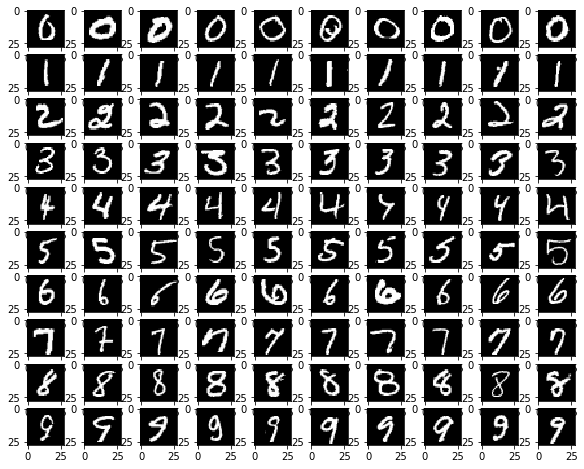

In [91]:
# Visualize 10 examples of 10 classes. You can extend the following code:

rows, cols = 10, 10
fig,ax = plt.subplots(nrows = rows, ncols = cols)

for i in range(rows):
    for j in range(cols):
        index = get_index_for_value(i, y_trainval)
        ax[i][j].imshow(x_trainval[index])

plt.savefig('fig1.pdf')   # Save the figures
plt.show()   # These should be some visualization of data at the end of this section

# 2. Digit classifiers

In this section, you'll begin developing models to perform digit classification.

Each model needs to be structured like so:
  1. Give a brief reason which model you are going to train and why you choose it
  1. Define hyper-parameters for model and optimization procedure
  1. Define your model
  1. Define optimization method and fit model to data
  1. Summarize your findings

## 2.1: Model [M1] kNearestNeighbors:  (25 points)

**Short description **: *fill this in*

### 2.1.1: Hyper-parameters

Define hyper-parameters for your model here

In [126]:
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

test_set = 'val'  #  or 'test'
k_s = np.asarray(range(1, 10)) if test_set == 'val' else np.asarray([3])

TESTING_FRAC = 0.1
LEN = len(x_trainval)

if test_set == 'val':
    train_idxs, val_idxs = range(int(LEN * TESTING_FRAC), LEN), range(0, int(LEN * TESTING_FRAC))   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.1.2: Data Preprocessing

In [127]:
# bring data into shape

x_train_flat, x_eval_flat, y_train_flat, y_eval_flat = flatten_sets(x_train, x_eval, y_train, y_eval)

### 2.1.3: Model

Define your model here

In [128]:
models = [sklearn.neighbors.KNeighborsClassifier(n_neighbors=k) for k in k_s]

### 2.1.4: Fit Model

Define optimization procedure and fit your model to the data

In [129]:
fit_all_models(models, x_train_flat, y_train_flat)

### 2.1.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot the score (accuracy) for each model using "plot_scores" function
  * Report score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions

In [130]:
scores = list()
for i in range(len(models)):
    scores.append(models[i].score(x_eval_flat, y_eval_flat))

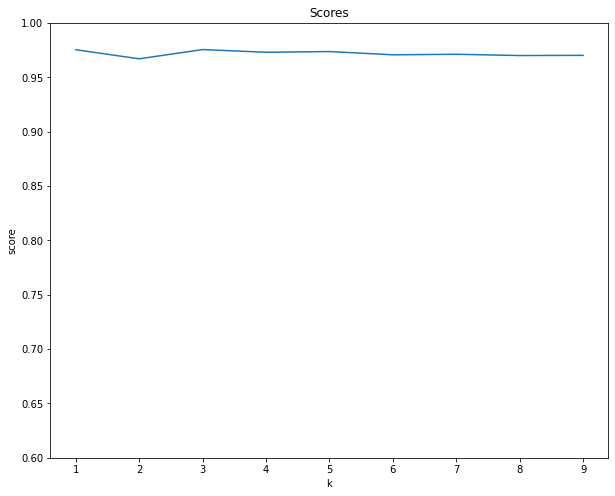

In [131]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

plot_scores(k_s, scores, title="Scores", x_label="k", y_label="score")

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.

In [132]:
# Here report the score for the best model

max_score = max(scores)
best_k_index = scores.index(max_score)

print(f"The best score is achieved with k = {k_s[best_k_index]} with a score of {max_score}")

The best score is achieved with k = 3 with a score of 0.9755


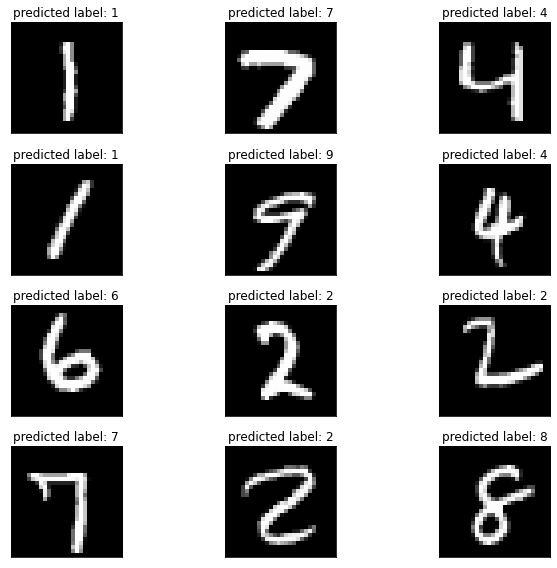

In [133]:
# Visualize the predictions

x_test_flat = flatten_input_pixels(x_test)

prediction = models[best_k_index].predict(x_test_flat)
vis_predictions(x_test_flat, prediction, len(x_test_flat))

### 2.1.6: Summary

Summarize your findings:

* The k parameter was important for kNN :). More or less all values between 1 and 10 worked just fine but we found that k = 3 was the best.
* We choose to flatten the input such that we only had a one dimensional vector and not a multi-dimensional one.

# 2.2: Model [M2]: SVM (25 points)

### 2.2.1: Hyper-parameters

Define hyper-parameters for your method here

In [134]:
# Decide all your hyperparameters based on validation performance
# Then, switch to 'test' for final evaluation

test_set = 'val'  #  or 'test'
kernels = np.asarray(["linear", "poly", "rbf"]) if test_set == 'val' else np.asarray(["rbf"])

if test_set == 'val':
    train_idxs, val_idxs = range(6_000, 25_000), range(0, 6_000)   # Fill in
    x_train, y_train = x_trainval[train_idxs], y_trainval[train_idxs]
    x_eval, y_eval = x_trainval[val_idxs], y_trainval[val_idxs]
else:
    x_train, y_train = x_trainval, y_trainval
    x_eval, y_eval = x_test, y_test

### 2.2.2: Data Preprocessing


In [135]:
# bring data into shape

x_train_flat, x_eval_flat, y_train_flat, y_eval_flat = flatten_sets(x_train, x_eval, y_train, y_eval)

### 2.2.3: Model

Define your model here (all hyper-parameters in 2.1.1)

In [136]:
models = [sklearn.svm.SVC(kernel=k, cache_size=10_000, random_state=random_seed) for k in kernels]

### 2.2.4: Fit Model

In [137]:
#  Please save the trained model

fit_all_models(models, x_train_flat, y_train_flat)

### 2.2.5: Evaluation

Evaluate your model.
  * Evaluate models with different parameters 
  * Plot score (accuracy) for each model using "plot_scores" function
  * Report the score for the best model
  * Use "vis_predictions" function to visualize few examples of test/validation set with the corresponding predictions

In [138]:
scores = list()
for i in range(len(models)):
    scores.append(models[i].score(x_eval_flat, y_eval_flat))

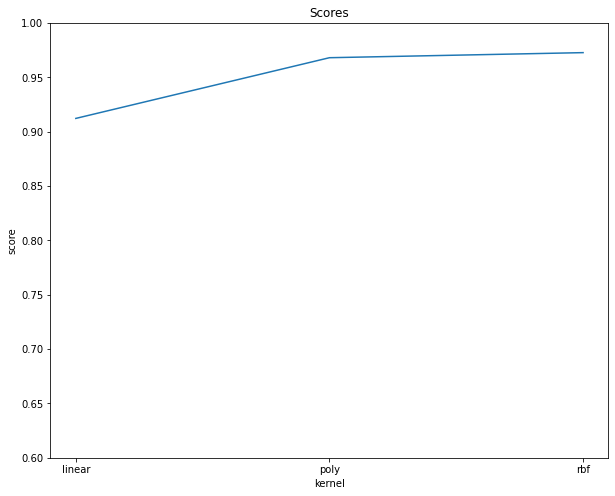

In [139]:
# Here plot score (accuracy) for each model. You can use "plot_scores" function.

plot_scores(kernels, scores, title="Scores", x_label="kernel", y_label="score")

# You can see an example in the follow.
# Note that the visualizations/plots provided are just simple examples/illustrations. 
# We encourage more informative and alternate methods to present results.

In [140]:
# Here report the score for the best model

max_score = max(scores)
best_kernel_index = scores.index(max_score)

print(f"The best score is with achieved with kernel {kernels[best_kernel_index]} with {max_score}")

The best score is with achieved with kernel rbf with 0.9726666666666667


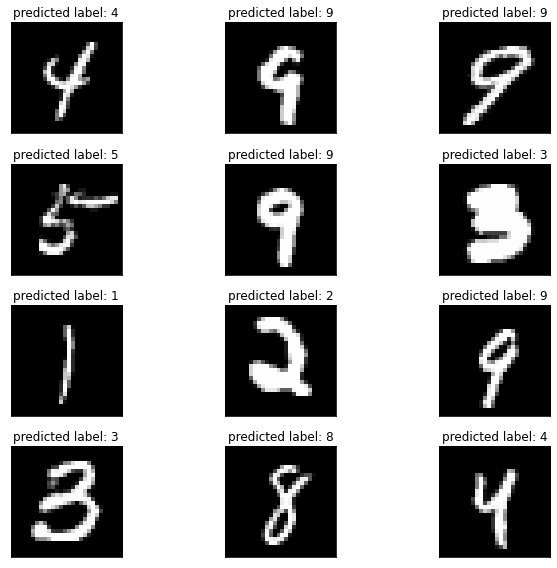

In [141]:
# Visualize the predictions

x_test_flat = flatten_input_pixels(x_test)

prediction = models[best_kernel_index].predict(x_test_flat)
vis_predictions(x_test_flat, prediction, len(x_test_flat))

### 2.2.6: Summary

* Instead of optimizing for kernel parameters we simply optimized for the kernel used and discovered RBF as the best fit. We did not further optimize because the SVM was already pretty accurate, but we acknowledge that optimizing for parameters like gamma could further improve the classification accuracy.

# 2.3: Model [M3] (Neural Networks): CNN (25 points)

In the following we will classify the MNIST dataset with using a convolutional neural network from pytorch.

### 2.3.1: Hyper-parameters

Define hyper-parameters for your method here

In [139]:
batch_size_train = 64
batch_size_test = 64
n_epochs = 20

transform = transforms.Compose([
    transforms.ToTensor(), # convert the pillow image to tensor
    transforms.Normalize((0.1307, ), (0.3081, )) # normalize
])

train_dataset = datasets.MNIST(root="../dataset/mnist", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="../dataset/mnist", train=False, download=True, transform=transform)

### 2.3.2: Data Preprocessing


In [140]:
train_loader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size_train)
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=batch_size_test)

### 2.3.3: Model

Define your model here

In [141]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.pooling = nn.MaxPool2d(2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(320, 10)
        
    def forward(self, x):
        x = F.relu(self.pooling(self.conv1(x)))
        x = F.relu(self.pooling(self.conv2(x)))
        x = self.flatten(x)
        x = self.fc(x)
        return x

### 2.2.4: Fit Model


In [142]:
model = Net()
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [143]:
def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, targets = data
        optimizer.zero_grad()
        
        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    loss_value = running_loss/len(train_loader)
    loss_values.append(loss_value)
    print("Loss: {:.4f}".format(loss_value))

In [144]:
def test():
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item() 
    accuracy = correct / total
    print(f"Test Accuracy: {accuracy}")
    test_accuracy.append(accuracy)

In [145]:
# Save your model using torch.save()

loss_values = []
test_accuracy = []
epochs = []
for epoch in range(n_epochs): 
    print(f"Epoch: {epoch}/{n_epochs}")
    epochs.append(epoch)
    train(epoch)
    test()
    print("-"*21)
torch.save(model.state_dict(), "CNN_MNIST.pkl")

Epoch: 0/20
Loss: 0.3321
Test Accuracy: 0.9692
---------------------
Epoch: 1/20
Loss: 0.1060
Test Accuracy: 0.9789
---------------------
Epoch: 2/20
Loss: 0.0783
Test Accuracy: 0.9817
---------------------
Epoch: 3/20
Loss: 0.0657
Test Accuracy: 0.983
---------------------
Epoch: 4/20
Loss: 0.0572
Test Accuracy: 0.9839
---------------------
Epoch: 5/20
Loss: 0.0517
Test Accuracy: 0.985
---------------------
Epoch: 6/20
Loss: 0.0466
Test Accuracy: 0.9851
---------------------
Epoch: 7/20
Loss: 0.0431
Test Accuracy: 0.985
---------------------
Epoch: 8/20
Loss: 0.0408
Test Accuracy: 0.987
---------------------
Epoch: 9/20
Loss: 0.0376
Test Accuracy: 0.9865
---------------------
Epoch: 10/20
Loss: 0.0361
Test Accuracy: 0.9853
---------------------
Epoch: 11/20
Loss: 0.0334
Test Accuracy: 0.9881
---------------------
Epoch: 12/20
Loss: 0.0320
Test Accuracy: 0.9872
---------------------
Epoch: 13/20
Loss: 0.0308
Test Accuracy: 0.9873
---------------------
Epoch: 14/20
Loss: 0.0287
Test Acc

### 2.2.5: Evaluation

Evaluate your model.

  * Loss curves: Plot epoch (# passes over training data) and loss
  * Accuracy curves: Plot epoch and accuracy over val/test set
  * Final numbers: Report final accuracy numbers for your model

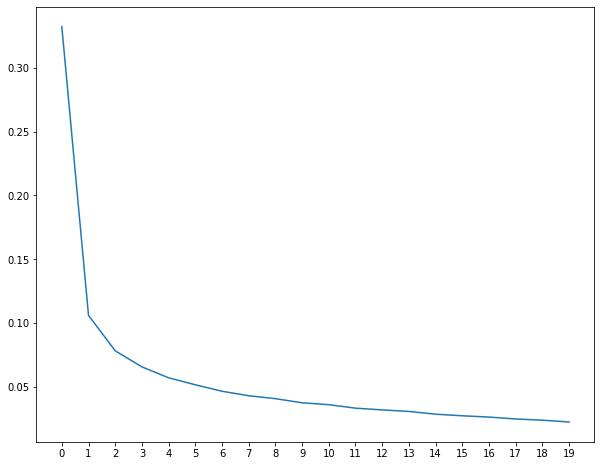

In [146]:
# Here plot epoch (# passes over training data) and loss

plt.xticks(epochs)
plt.plot(loss_values)

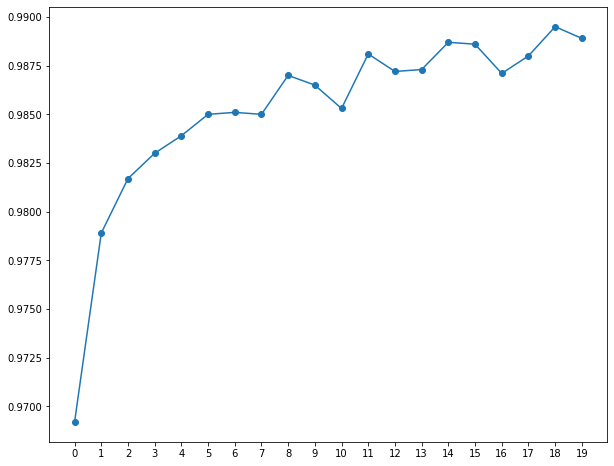

In [147]:
# Here plot epoch and accuracy over val/test set

plt.xticks(epochs)
plt.plot(test_accuracy,'-o')

In [148]:
# load the model

net = Net()
net.load_state_dict(torch.load("./CNN_MNIST.pkl"))
net.eval()

Net(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (pooling): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=320, out_features=10, bias=True)
)

In [149]:
# Here report the score for the best model

max_accuracy = max(test_accuracy)
print(f"The score for the best model is {max_accuracy}")

The score for the best model is 0.9895


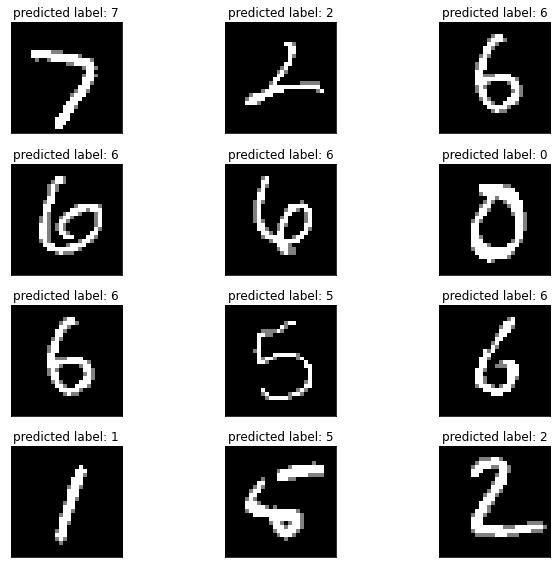

In [201]:
# Visualize the predictions

for step, (X, y) in enumerate(test_loader):
    if step == 0:
        prediction = model(X).detach().numpy()
        labels = [list(pred).index(max(pred)) for pred in prediction]
        vis_predictions(X.detach().numpy(), labels, len(X))

### 2.3.6: Summary

* We decided on using a batch size of 64 which allows for faster training while keeping accuracy high enough. The neural network was pretty accurate after the first epoch of training but from looking at the graphs it's also obvious that with further training the accuracy climbs up. 
* There are also other important hyper-parameters that will influence the results:
  - n_epochs whcih affects the convergence of the loss function, too small, loss cannot converge; too large, will cause a waste of time and resources to train; 
  - number of hidden layers and units which determines the complexity of model. Too many layers will result in poor generalization, too many parameters and too large model;
  - learning rate: the weight in the optimization algorithm, which defines how fast a neural network updates its parameters .
* For the type of NN we made use of a convolutional neural network. A CNN just makes the most sense because it groups relevant infos into groups and is able to reduce the amount of connections in the network, further speeding up the training.
* The output value of the NN was a vector not a direct classification but the conversion was simple enough in the MNIST case.

# 3. Summary (20 points)

Enter your final summary here.

You should now compare performance  on the three models [M1], [M2] and [M3]. Present this in a tabular format and/or using plots.

Which model do you recommend performing digit classification and why?

Feel free to discuss other insightful observations.

I would recommend M1(KNN) to perform digit classification based on the following 3 reasons:
- Good enough performance. The classification accuracy can reach 97.55%. 
- Low model complexity. KNN is a very simple model with less parameters than other models. 
- Strong interpretability. KNN model is eary to interpret compared with black-box models - neural networks.
But in the meanwhile, this choice is limited to MNIST or data sets with similar size. Because when the scale of data is too large, KNN loads all the data into the memory, which will burst the memory, especially when resources are limited. In addition to that, for classification tasks that require extremely high classification accuracy, I would recommend neural networks. Although design of neural networks is relatively complicated and the working process is difficult to interpret, they can reach best performance among all the models. Considering the generalization of the model, we should train models with a wide variety of data. In this regard, I think neural networks take advantages over other models as they are convenient to save, load, and continue training. This will make the model better and better, which is more like the learning process of human beings.

Final accuracy for each model: 

| Models | Accuracy |
| --- | --- |
| KNN | 97,55% |
| SVM | 97,26% |
| CNN | 98,95% |
